เคสนี้เราจะทำนายยอดขาย ของร้านขายยาในเครือ Rossmann ที่มีกว่า 3000 สาขา ใน 7 ประเทศแถบยุโรป โดยเราจะทำนายจากข้อมูล ร้านค้า โปรโมชั่น ข้อมูลคู่แข่ง และข้อมูลประกอบภายนอก ได้แก่ Google Trends, พยากรณ์อากาศ, etc.

# 0. Magic Commands


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [2]:
from fastai import *
from fastai.tabular import *

# 2. ข้อมูล

เคสนี้เราจะใช้ Dataset ชื่อ [Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales) จาก Kaggle

รัน cell ด้านล่างเพื่อดาวน์โหลด Dataset

In [3]:
# ! wget http://files.fast.ai/part2/lesson14/rossmann.tgz 
# ! mv ./rossmann.tgz ~/.fastai/data
# ! mkdir ~/.fastai/data/rossmann
# ! tar -xvzf ~/.fastai/data/rossmann.tgz -C ~/.fastai/data/rossmann

In [4]:
path=Config().data_path()/Path('rossmann/')

## 2.1 ดูรายการไฟล์

ls ดูว่ามีไฟล์อะไรบ้าง

In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/rossmann/state_names.csv'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/joined'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/test.csv'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/sample_submission.csv'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/googletrend.csv'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/weather.csv'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/joined_test'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/store.csv'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/train_clean'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/models'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/train.csv'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/df'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/store_states.csv'),
 PosixPath('/home/jupyter/.fastai/data/rossmann/test_clean')]

ใช้ Pandas read_csv ไปใส่ DataFrame ตามชื่อไฟล์

In [6]:
table_names = ['train', 'store', 'store_states', 'state_names', 'googletrend', 'weather', 'test']
tables = [pd.read_csv(path/f'{fname}.csv', low_memory=False) for fname in table_names]
train, store, store_states, state_names, googletrend, weather, test = tables
len(train),len(test)

(1017209, 41088)

## 2.2 ดูข้อมูลทุกตาราง

เป็นการดี ที่เราสำรวจข้อมูลก่อน เพื่อจะได้รู้จักหน้าตาข้อมูลในทุกตาราง

In [7]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
train.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,2013-08-17,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [9]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store_states.head()

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


In [11]:
state_names.head()

,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


In [12]:
googletrend.head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


In [13]:
weather.head()

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


In [14]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


## 2.3 Feature Engineering

### แปลงชนิดข้อมูล train.StateHoliday 

ดูข้อมูลวันหยุดราชการ ว่ามีค่าอะไรบ้าง a = public holiday วันหยุดราชการ, b = Easter holiday วันอีสเตอร์, c = Christmas วันคริสต์มาส, 0 = None

In [15]:
train.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

แต่ละค่ามีจำนวนเท่าไร

In [16]:
train.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

จะเห็นว่าข้อมูล skew มาก เราจะแปลงให้เป็น boolean ว่าเป็นวันหยุด หรือไม่เป็นวันหยุด เท่านั้น

In [17]:
train.StateHoliday = train.StateHoliday!='0'
test.StateHoliday = test.StateHoliday!='0'

หลังแปลง

In [18]:
train.StateHoliday.value_counts()

False    986159
True      31050
Name: StateHoliday, dtype: int64

### แตก Field ใหม่

ในตาราง googletrend ข้อมูลจะมาเป็น ช่วงวัน 1 สัปดาห์ เราจะแตก Column เป็น Date ของวันที่เริ่ม และ แตก Column State ออกมาจากท้ายรหัสใน file 

และแก้ HB,NI เป็น NI ให้เหมือน State อื่น ๆ 

เรื่องการใช้ Pandas จะอธิบายต่อไป

In [19]:
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]
googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'

### Date Part

เราสามารถทำ Feature Engineering แตกความหมายแฝงใน Date ออกเป็น Column ย่อย ๆ (นอกเหนือจากวันเดือนปี) เพื่อให้โมเดล มอง Pattern ได้ง่ายขึ้น เช่น ปี เดือน วัน สัปดาห์ วันที่เท่าไรของสัปดาห์ วันที่เท่าไรของปี เป็นวันสิ้นเดือนหรือไม่ เป็นวันต้นเดือนหรือไม่ เป็นวันสิ้นใตรมาสหรือไม่ เป็นวันสิ้นปีหรือไม่ etc.

เพราะ วันสิ้นเดือน วันสุดสัปดาห์ วันสิ้นปี น่าจะมีผลต่อยอดขาย ต่างกับวันธรรมดา ถ้าเราให้แต่ Date กับโมเดล จะเป็นการยากมากที่โมเดลจะมองออกเอง

In [20]:
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

เราจะเรียกฟังก์ชัน add_datepart กับ Column Date ของทุกตาราง

In [21]:
add_datepart(weather, "Date", drop=False)
add_datepart(googletrend, "Date", drop=False)
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)

ลองดู googletrend จะมี Column เพิ่มจาก 5 กลายเป็น 18

In [22]:
googletrend.head()

,file,week,trend,Date,State,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02,SN,2012,12,48,2,6,337,False,False,False,False,False,False,1354406400
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09,SN,2012,12,49,9,6,344,False,False,False,False,False,False,1355011200
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16,SN,2012,12,50,16,6,351,False,False,False,False,False,False,1355616000
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23,SN,2012,12,51,23,6,358,False,False,False,False,False,False,1356220800
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30,SN,2012,12,52,30,6,365,False,False,False,False,False,False,1356825600


### Join ตารางเข้าด้วยกัน

Join ข้อมูลเข้าด้วยกัน เป็นตารางใหญ่ตารางเดียว จะได้เอาไปสร้าง Databunch สำหรับให้โมเดล

ประกาศฟังก์ชันสำหรับ Join 2 Dataframe เข้าด้วยกัน จาก Column ที่กำหนด แบบ Left Outer Join ด้วย merge แล้วจึงเช็คค่า null ดูว่ามีข้อมูลหลุดไหม จะดีกว่า Inner Join ที่เราจะไม่สามารถทราบได้ว่า มีข้อมูลหลุดหรือไม่

โดยถ้ามี Column ชื่อซ้ำกัน ให้เติมชื่อ Column ใน df ทางขวาด้วย '\_y' 

In [23]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

Join weather กับ state_names

In [24]:
weather = join_df(weather, state_names, "file", "StateName")

Join store กับ store_states

In [25]:
store = join_df(store, store_states, "Store")
len(store[store.State.isnull()])

0

Join train, test กับ store ตั้งชื่อว่า joined, joined_test แล้วเช็คว่า Record ไหนที่หลุดบ้าง จะมีค่าเป็น null

In [26]:
joined = join_df(train, store, "Store")
joined_test = join_df(test, store, "Store")
len(joined[joined.StoreType.isnull()]),len(joined_test[joined_test.StoreType.isnull()])

(0, 0)

Join joined, joined_test กับ googletrend แล้วเช็คว่า Record ไหนที่หลุดบ้าง จะมีค่าเป็น null

In [27]:
joined = join_df(joined, googletrend, ["State","Year", "Week"])
joined_test = join_df(joined_test, googletrend, ["State","Year", "Week"])
len(joined[joined.trend.isnull()]),len(joined_test[joined_test.trend.isnull()])

(0, 0)

เราจะแยก googletrend ของทั้งประเทศเยอรมันไว้ต่างหาก เป็นอีกตาราง

In [28]:
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

Join joined, joined_test กับ trend_de แล้วเช็คว่า Record ไหนที่หลุดบ้าง จะมีค่าเป็น null

In [29]:
joined = joined.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
joined_test = joined_test.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
len(joined[joined.trend_DE.isnull()]),len(joined_test[joined_test.trend_DE.isnull()])

(0, 0)

Join joined, joined_test กับ weather แล้วเช็คว่า Record ไหนที่หลุดบ้าง จะมีค่าเป็น null

In [30]:
joined = join_df(joined, weather, ["State","Date"])
joined_test = join_df(joined_test, weather, ["State","Date"])
len(joined[joined.Mean_TemperatureC.isnull()]),len(joined_test[joined_test.Mean_TemperatureC.isnull()])

(0, 0)

วนลูปลบ Column ซ้ำที่เราให้ลงท้ายด้วย '\_y'

In [31]:
for df in (joined, joined_test):
    for c in df.columns:
        if c.endswith('_y'):
            if c in df.columns: df.drop(c, inplace=True, axis=1)

เนื่องจากโมเดลอาจจะมีปัญหา กับข้อมูลขาด NA (Not Available) เราจะเติมข้อมูลที่ขาดไปด้วย fillna ด้วย ปี 1900, 1 เดือน และ 1 สัปดาห์

In [32]:
for df in (joined,joined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

สร้าง Field Date ขึ้นมาจาก 2 Field Number และใช้ Field ใหม่นั้น คำนวน จำนวนวันตั้งแต่คู่แข่งเปิดสาขา จาก CompetitionOpenSinceYear และ CompetitionOpenSinceMonth

In [33]:
for df in (joined,joined_test):
    df["CompetitionOpenSince"] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, 
                                                     month=df.CompetitionOpenSinceMonth, day=15))
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days

Clear ข้อมูลนอกลู่นอกทาง เช่น คู่แข่งยังไม่เปิดร้าน แต่จะเปิดในอนาคต หรือเปิดมาแล้วนานมาก ก่อน 1990 ให้เป็น 0

In [34]:
for df in (joined,joined_test):
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

สร้าง CompetitionMonthsOpen จาก CompetitionDaysOpen หาร 30 วัน และถ้าค่าเกิน 24 เดือน ก็ให้เท่ากับ 24 เดือน

In [35]:
for df in (joined,joined_test):
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined.CompetitionMonthsOpen.unique()

array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,  1, 14, 20,  8, 18,  6, 21,  5])

### Week

รัน cell ด้านล่างเพื่อ install isoweek

In [36]:
# ! pip install isoweek

แปลงข้อมูล Week จาก Promo2SinceYear, Promo2SinceWeek เป็น Date ชื่อ Promo2Since จะได้ใช้งานสะดวกขึ้น และสร้าง Column ใหม่ Promo2Days นับวันจนวันที่ใน Column Date

In [37]:
from isoweek import Week
for df in (joined,joined_test):
    df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: Week(
        x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days

Clear ข้อมูล Promo2Days, Promo2SinceYear โปรโมชั่นในอนาคต หรือโปรโมชั่นนานมากแล้ว ก่อน 1990 ให้เป็น 0

สร้าง Column ใหม่ Promo2Weeks จำกัดข้อมูลให้อยู่ในช่วงที่ต้องการ ระหว่าง 0 ถึง 24

In [38]:
for df in (joined,joined_test):
    df.loc[df.Promo2Days<0, "Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25
    df.Promo2Weeks.unique()

Save ข้อมูลที่เราแปลงเรียบร้อยแล้ว เอาไว้ก่อน เวลามีปัญหาจะได้ไม่ต้องทำใหม่

In [39]:
joined.to_pickle(path/'joined')
joined_test.to_pickle(path/'joined_test')

### Durations

ก่อนหน้านี้เป็นการ Feature Engineering ดึงความหมายของข้อมูลระหว่าง Column ต่อไปเราจะ ดึงความหมายของข้อมูลระหว่าง Row ดูบ้าง เช่น

* ค่าเฉลี่ยแบบเคลื่อนที่ 
* ระยะเวลาก่อนจะถึงเหตุการณ์ครั้งต่อไป
* ระยะเวลาหลังจากเกิดเหตุการณ์ครั้งที่แล้ว

ประกาศฟังก์ชัน คำนวนระยะเวลา วันที่ผ่านไป ของ Column ที่กำหนด นับวันที่มีการเปลี่ยนแปลงค่า ถ้าพบว่าค่าเปลี่ยนอีกครั้ง ก็จะ reset counter เป็น 0 แล้วเริ่มนับใหม่ และเริ่มนับใหม่เมื่อเปลี่ยน Store สาขา

In [40]:
def get_elapsed(fld, pre):
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(df.Store.values,df[fld].values, df.Date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res

เราจะเรียกฟังก์ชันกับทุก Column ด้านล่าง 

In [41]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]

เราจะ append train, test dataframe เข้าด้วยกัน เพราะมันไม่ตรงกันอยู่แล้ว (สาขา, วันที่) จะได้ทำทีเดียว

In [42]:
#df = train[columns]
df = train[columns].append(test[columns])

เรียกฟังก์ชัน get_elapsed ด้วย SchoolHoliday ทั้ง 2 ทิศทาง ทั้ง Before และ After

In [43]:
fld = 'SchoolHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

เรียกฟังก์ชัน get_elapsed ด้วย StateHoliday ทั้ง 2 ทิศทาง ทั้ง Before และ After

In [44]:
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

เรียกฟังก์ชัน get_elapsed ด้วย Promo ทั้ง 2 ทิศทาง ทั้ง Before และ After

In [45]:
fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

เราจะ fillna ข้อมูลที่ขาดไป จาก การเรียกฟังก์ชันด้านบน ด้วยเลข 0

In [46]:
df = df.set_index("Date")

In [47]:
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

In [48]:
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(0).astype(int)

### Rolling

ค่า Sum แบบเคลื่อนที่ window = 7 วัน

เปิดดู df ว่าหน้าตาเป็นอย่างไร

In [49]:
df.head()

,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo
Date,,,,,,,,,,
2015-09-17,1,1,False,0,13,0,105,0,0,0
2015-09-16,1,1,False,0,12,0,104,0,0,0
2015-09-15,1,1,False,0,11,0,103,0,0,0
2015-09-14,1,1,False,0,10,0,102,0,0,0
2015-09-13,1,0,False,0,9,0,101,0,9,-1


สร้าง bwd, fwd จาก df ใน Column ที่กำหนด ('Store', 'SchoolHoliday', 'StateHoliday', 'Promo') โดย Group by Store แล้ว Sum ทุก Column ใน windows 7 วัน

In [50]:
bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()

In [51]:
bwd.head()

Store  SchoolHoliday  StateHoliday  Promo
Store Date                                                 
1     2013-01-01    1.0            1.0           1.0    0.0
      2013-01-02    2.0            2.0           1.0    0.0
      2013-01-03    3.0            3.0           1.0    0.0
      2013-01-04    4.0            4.0           1.0    0.0
      2013-01-05    5.0            5.0           1.0    0.0

กลับทิศจากวันที่มากไปน้อย

In [52]:
fwd = df[['Store']+columns].sort_index(ascending=False
                                      ).groupby("Store").rolling(7, min_periods=1).sum()

ลบ Column Store ทิ้ง เพราะ Sum ของ Store ย้อนหลัง 7 วัน ไม่มีความหมาย แล้ว Reset index 

In [53]:
bwd.drop('Store',1,inplace=True)
bwd.reset_index(inplace=True)

In [54]:
bwd.head()

,Store,Date,SchoolHoliday,StateHoliday,Promo
0,1,2013-01-01,1.0,1.0,0.0
1,1,2013-01-02,2.0,1.0,0.0
2,1,2013-01-03,3.0,1.0,0.0
3,1,2013-01-04,4.0,1.0,0.0
4,1,2013-01-05,5.0,1.0,0.0


In [55]:
fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)

Reset index ของ df เพื่อเตรียม merge กับ bwd, fwd

In [56]:
df.reset_index(inplace=True)

In [57]:
df.head()

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo
0,2015-09-17,1,1,False,0,13,0,105,0,0,0
1,2015-09-16,1,1,False,0,12,0,104,0,0,0
2,2015-09-15,1,1,False,0,11,0,103,0,0,0
3,2015-09-14,1,1,False,0,10,0,102,0,0,0
4,2015-09-13,1,0,False,0,9,0,101,0,9,-1


สั่ง merge df กับ bwd, fwd ถ้าเจอชื่อซ้ำ ให้ต่อท้ายด้วย \_bw และ \_fw ตามลำดับ

In [58]:
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

drop Column ปกติทิ้งไป ให้เหลือแต่ Column ที่เราสร้างใหม่จาก Duration, Rolling สังเกตชื่อ BeforeXXX, AfterXXX, XXX\_bw, XXX\_fw

In [59]:
df.drop(columns,1,inplace=True)

ลองดู df ที่มีแต่ Column ที่เราสร้างใหม่

In [60]:
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-09-17,1,13,0,105,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0
1,2015-09-16,1,12,0,104,0,0,0,0.0,0.0,3.0,0.0,0.0,2.0
2,2015-09-15,1,11,0,103,0,0,0,0.0,0.0,2.0,0.0,0.0,3.0
3,2015-09-14,1,10,0,102,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
4,2015-09-13,1,9,0,101,0,9,-1,0.0,0.0,0.0,0.0,0.0,4.0


Save ไว้ก่อน

In [61]:
df.to_pickle(path/'df')

แปลง Column Date จาก Type String เป็น Date

In [62]:
df["Date"] = pd.to_datetime(df.Date)

ลองดูว่ามี Column อะไรบ้าง

In [63]:
df.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
       'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw',
       'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

Load joined และ joined_test ที่เก็บ dataframe ที่ Join ทุกตารางด้วยกันไว้ ขึ้นมา

In [64]:
joined = pd.read_pickle(path/'joined')
joined_test = pd.read_pickle(path/f'joined_test')

Join เข้ากับ df ที่เราสร้างใหม่

In [65]:
joined = join_df(joined, df, ['Store', 'Date'])

In [66]:
joined_test = join_df(joined_test, df, ['Store', 'Date'])

เนื่องจากใน df เรารวม Training Set และ Test Set เข้าด้วยกัน เมื่อ merge กับ joined เราจึงต้องกรอง joined ให้เหลือแต่ Record ที่มีข้อมูล ยอดขาย ไม่เท่ากับ 0 ให้เหลือแต่ Training Set เท่านั้น

In [67]:
joined = joined[joined.Sales!=0]

Reset index

In [68]:
joined.reset_index(inplace=True)
joined_test.reset_index(inplace=True)

Save joined สุดท้ายไว้ก่อน มีอะไร จะได้ไม่ต้องแปลงใหม่

In [69]:
joined.to_pickle(path/'train_clean')
joined_test.to_pickle(path/'test_clean')

# 3. เตรียมข้อมูล



Load ข้อมูล joined สุดท้ายขึ้นมาใส่ train_df, test_df

In [70]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

นับดูว่า Training Set, Test Set มีอย่างละกี่ Record

In [71]:
len(train_df),len(test_df)

(844338, 41088)

เนื่องจาก Column เยอะมาก ถึง 93 Column เราจะ Tranpose แล้วค่อย Print

In [72]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [73]:
test_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Id,1,2,3,4,5
Store,1,3,7,8,9
DayOfWeek,4,4,4,4,4
Date,2015-09-17 00:00:00,2015-09-17 00:00:00,2015-09-17 00:00:00,2015-09-17 00:00:00,2015-09-17 00:00:00
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,0,0,0,0,0
Year,2015,2015,2015,2015,2015


กำหนด Preprocessing ให้ databunch

In [74]:
procs=[FillMissing, Categorify, Normalize]

กำหนดว่า Column ไหน เป็น Independent Variable แบบ Category หรือ Continuous

In [75]:
# cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'SchoolHoliday', 'CompetitionMonthsOpen',
#     'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
#     'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
#     'SchoolHoliday_fw', 'SchoolHoliday_bw']

# cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
#    'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
#    'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
#    'AfterStateHoliday', 'BeforeStateHoliday', 'Promo']

cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 
    'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 
    'StateHoliday', 'SchoolHoliday', 'CompetitionMonthsOpen', 'Open', 
    'Promo2Weeks', 'Promo2Days', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 
    'Promo2SinceYear', 'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 'Precipitationmm',
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE', 'AfterSchoolHoliday', 'BeforeSchoolHoliday', 
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'AfterPromo', 'BeforePromo']

กำหนด Dependent Variable

In [76]:
dep_var = 'Sales'

สร้าง df เตรียมใส่ databunch

In [77]:
df = train_df[cat_vars + cont_vars + [dep_var,'Date']].copy()

หาช่วงวันของ Test Set

In [78]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

กำหนดว่าจะแบ่ง Training Set, Validation Set ยังไง

In [79]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

In [80]:
valid_idx = range(cut)

ลองดู Dependent Variable

In [81]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

สร้าง Databunch จากการกำหนดค่าด้านบน

In [82]:
databunch = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

## สำรวจข้อมูล ##


*เราสามารถรัน cell นี้หลายครั้ง เพื่อเรียกดู batch ต่อ ๆ ไป ได้เรื่อย ๆ เป็นการสำรวจข้อมูล*

In [83]:
databunch.show_batch(rows=10)

Store,DayOfWeek,Year,Month,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,StateHoliday,SchoolHoliday,CompetitionMonthsOpen,Open,Promo2Weeks,Promo2Days,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_fw,StateHoliday_bw,SchoolHoliday_fw,SchoolHoliday_bw,CompetitionDistance_na,CloudCover_na,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Precipitationmm,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,Promo,AfterPromo,BeforePromo,target
23,4,2015,5,21,3,141,False,False,False,False,False,False,False,0,24,1,0,0,d,a,#na#,2005,1900,RP,21,#na#,2.0,4.0,1.0,0.0,0.0,0.0,False,False,-0.1783,0.4941,0.1863,-0.2438,0.2092,-1.8745,-1.6088,-0.3999,-0.3080,-0.3129,-1.5917,0.4066,0.4888,0.8343,-1.8272,-0.9857,1.0616,1.1119,-0.5575,0.8956,8.608313
90,3,2013,7,24,2,205,False,False,False,False,False,False,False,1,24,1,0,0,a,a,#na#,2007,1900,NW,30,Fog-Rain-Thunderstorm,2.0,2.0,0.0,0.0,5.0,3.0,False,False,-0.6563,1.5765,1.5960,1.6488,-0.5781,-0.0345,-0.3867,-0.1780,-0.3080,-0.6483,-0.3604,1.0410,0.7049,-1.0682,1.0552,0.5308,-1.0022,-0.8994,0.4437,-0.6666,8.707813
49,2,2014,10,28,1,301,False,False,False,False,False,False,False,1,24,1,0,0,d,c,#na#,2007,1900,BW,44,#na#,1.0,3.0,1.0,0.0,3.0,2.0,False,False,1.6094,-0.4680,-0.5185,-0.5592,0.8653,0.8854,0.7846,-1.3986,-0.3080,-1.4869,-0.3604,1.4035,0.7049,-1.0682,1.0552,-0.4170,1.0616,-0.8994,0.2434,-0.9791,8.573384
463,6,2014,11,15,5,319,False,False,False,False,False,False,False,0,0,1,0,0,a,a,#na#,1900,1900,NW,46,Rain,0.0,5.0,0.0,0.0,0.0,0.0,False,False,-0.1655,-0.2275,0.0454,0.3871,0.0780,0.7321,0.9883,0.1549,-0.3080,-0.1452,0.2552,0.5878,0.2726,0.2775,-0.5366,-0.7645,-0.0473,-0.8994,-0.3573,-1.9164,8.300281
941,3,2013,2,20,2,51,False,False,False,False,False,False,False,0,14,1,0,0,a,a,"Jan,Apr,Jul,Oct",2011,2013,BY,8,Snow,3.0,3.0,0.0,0.0,0.0,2.0,False,False,-0.5448,-1.5504,-1.6462,-1.5055,0.8653,0.8088,0.6827,-0.1780,-0.3080,-0.6483,0.2552,-1.5873,-1.5649,-0.8362,-0.3645,0.2149,0.0451,1.1119,-0.5575,0.8956,8.502485
406,1,2015,2,2,0,33,False,False,False,False,False,False,False,0,24,1,25,700,d,c,"Feb,May,Aug,Nov",2001,2013,RP,6,Rain-Snow,5.0,5.0,0.0,0.0,0.0,0.0,False,False,0.3574,-1.0693,-0.9414,-0.7169,0.3404,-0.1879,-0.3357,0.3768,-0.3080,0.1902,0.8708,0.2253,0.0564,0.1383,-1.1819,-0.1959,-0.6633,1.1119,-0.5575,0.8956,9.082507
659,6,2013,11,16,5,320,False,False,False,False,False,False,False,0,20,1,0,0,d,a,#na#,2012,1900,HE,46,#na#,5.0,0.0,0.0,0.0,0.0,0.0,False,False,-0.4948,-1.0693,-0.8004,-0.2438,-0.8405,0.4254,1.0901,-0.7328,-0.3080,-0.1452,1.4864,0.5878,0.5969,-0.0473,-0.5366,0.1833,-0.0165,-0.8994,1.0444,0.2707,8.285261
996,1,2014,2,17,0,48,False,False,False,False,False,False,False,1,0,1,25,1421,c,a,"Jan,Apr,Jul,Oct",2015,2010,SN,8,#na#,5.0,1.0,0.0,0.0,5.0,1.0,False,False,-0.3308,-0.5883,-0.5185,-0.5592,-0.8405,-0.3412,-0.7431,-0.1780,-0.3080,0.1902,-0.9761,-1.4060,-1.0245,-1.0682,1.0552,0.2780,-0.6633,1.1119,-0.5575,0.8956,9.21014
242,3,2013,6,12,2,163,False,False,False,False,False,False,False,0,24,1,25,800,d,a,"Jan,Apr,Jul,Oct",2001,2011,HE,24,Rain,2.0,2.0,0.0,0.0,0.0,0.0,False,False,0.1831,1.0954,1.0322,0.8602,0.8653,-0.1112,-0.0811,-0.5109,-0.3080,-0.9837,0.2552,0.3159,0.1645,2.0872,0.0227,-0.7961,-2.2959,-0.8994,0.4437,-0.6666,8.03041
540,4,2013,10,31,3,304,True,False,False,False,False,False,False,1,0,1,25,339,d,c,"Jan,Apr,Jul,Oct",1900,2012,BY,44,Fog,3.0,1.0,1.0,0.0,1.0,4.0,False,False,-0.5948,-0.8288,-0.9414,-0.7169,0.8653,1.6521,1.8540,-0.7328,-0.3080,-0.6483,1.4864,-0.2278,0.0564,-1.0682,1.0552,-0.3222,1.1540,-0.8994,0.6439,-0.3542,8.406709


# 4. สร้างโมเดล

กำหนดค่าช่วง Output ให้เป็น ระหว่าง 0 ถึง เลยค่ามากที่สุดไป 10%

In [84]:
max_log_y = np.log(np.max(train_df['Sales'])*1.1)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

เนื่องจากตารางเล็ก ๆ ไม่ซับซ้อน เราจะสร้างโมเดล ที่ประกอบด้วย Dense Layer ที่ Deep แค่ 2 Hidden Layer โดย ps คือ Dropout ของแต่ละ Layer, emb_drop คือ Dropout สำหรับ Embedding, metrics ที่ใช้คือ exponential root mean squared percentage error (exp_rmspe)

In [85]:
learner = tabular_learner(databunch, layers=[1024, 512], 
                          ps=[0.005,0.05], emb_drop=0.05, 
                          y_range=y_range, metrics=exp_rmspe, 
                          callback_fns=[ShowGraph])

# 5. เริ่มต้นเทรนโมเดล

เทรน 6 Epoch

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.026415,0.028457,0.152033,02:13
1,0.026642,0.029624,0.185552,02:15
2,0.025721,0.021594,0.145841,02:15
3,0.021101,0.017513,0.130020,02:15
4,0.015220,0.015981,0.123188,02:15
5,0.013051,0.013491,0.113283,02:16


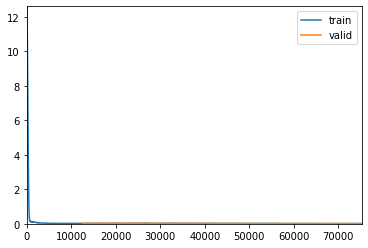

In [86]:
learner.fit_one_cycle(6, max_lr=3e-3, wd=0.2)

Save โมเดลไว้ก่อน

In [87]:
learner.save("05b-tabular-rossmann-1")

In [88]:
learner.load("05b-tabular-rossmann-1");

เทรนต่อ อีก 8 Epoch โดยลด learning rate ลง

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.012121,0.014389,0.120444,02:15
1,0.013918,0.013917,0.120564,02:15
2,0.012426,0.014252,0.114526,02:16
3,0.012695,0.013608,0.117373,02:15
4,0.012122,0.013834,0.116459,02:16
5,0.012444,0.012930,0.108575,02:16
6,0.009684,0.013470,0.109399,02:15
7,0.009629,0.012504,0.108249,02:16


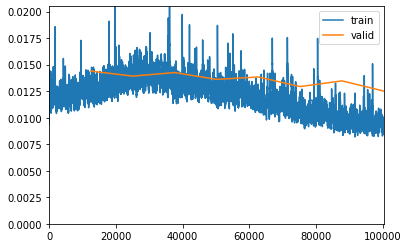

In [89]:
learner.fit_one_cycle(8, max_lr=3e-4, wd=0.1)

Save ไว้ก่อน

In [90]:
learner.save("05b-tabular-rossmann-2")

In [91]:
learner.load("05b-tabular-rossmann-2");

เทรนต่อ อีก 8 Epoch โดยลด learning rate ลงอีก

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.009610,0.012275,0.109118,02:14
1,0.010174,0.012473,0.111818,02:15
2,0.014242,0.013172,0.110703,02:14
3,0.011479,0.012381,0.109250,02:14
4,0.009804,0.012732,0.108397,02:15
5,0.009093,0.012114,0.106659,02:14
6,0.007895,0.012770,0.108332,02:15
7,0.008304,0.013162,0.108410,02:15


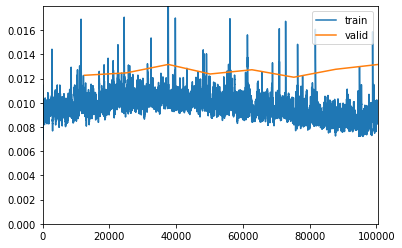

In [92]:
learner.fit_one_cycle(8, max_lr=1e-4, wd=0.2)

Save ไว้ก่อน

In [93]:
learner.save("05b-tabular-rossmann-3")

In [94]:
learner.load("05b-tabular-rossmann-3");

## สำเร็จแล้ว ##

ใช้เวลาประมาณ 45 นาที เราเทรน Model ได้ exp_rmspe ประมาณ 0.102


# 6. ดูผลลัพธ์

ลองดูข้อมูล Record ที่ 850

In [95]:
row = df.iloc[850]
row

Store                                       852
DayOfWeek                                     5
Year                                       2015
Month                                         7
Day                                          31
Dayofweek                                     4
Dayofyear                                   212
Is_month_end                               True
Is_month_start                            False
Is_quarter_end                            False
Is_quarter_start                          False
Is_year_end                               False
Is_year_start                             False
StateHoliday                              False
SchoolHoliday                                 1
CompetitionMonthsOpen                        24
Open                                          1
Promo2Weeks                                  25
Promo2Days                                 1579
StoreType                                     c
Assortment                              

ให้โมเดลทำนายกัน

In [96]:
np.exp(learner.predict(row)[0].data)[0], row.Sales

(5439.5205, 5722)

โมเดลทำนายได้ใกล้เคียง

ให้ทำนาย Test Set

In [97]:
test_preds=learner.get_preds(DatasetType.Test)
test_df["Sales"]=np.exp(test_preds[0].data).numpy().T[0]
test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)

ส่งประกวดไปยัง Kaggle

In [99]:
! kaggle competitions submit rossmann-store-sales -f {'rossmann_submission.csv'} -m "My submission"

100%|████████████████████████████████████████| 433k/433k [00:10<00:00, 41.7kB/s]
Successfully submitted to Rossmann Store Sales

# 7. สรุป

1. ข้อมูลแบบ Time Series ไม่จำเป็นต้องใช้โมเดล แบบ RNN เสมอไป เราสามารถทำ Feature Engineering กระจายข้อมูลวันเวลา ออกมาเป็นหลาย ๆ Column จะช่วยให้โมเดลทำงานได้ง่ายขึ้นกว่า Date อย่างเดียว
2. เราสามารถใส่ Domain Knowledge ความสัมพันธ์ระหว่าง Column และ ระหว่าง Row เข้าไปได้ โดยที่ต้องเขียนโปรแกรมเพิ่มนิดหน่อย
3. การใช้ข้อมูลจากหลาย ๆ แหล่งมา join กัน ทำให้ได้ Domain Knowledge ที่หลากหลายมากขึ้น

# Credit 

* [FastAI: Practical Deep Learning for Coders, v3 - Lesson 6](https://course.fast.ai/videos/?lesson=6)
* [Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales)
* [Rossmann Additional Info](http://files.fast.ai/part2/lesson14/rossmann.tgz)